## Rumore rosa

In [2]:
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = (14,4)

Il rumore rosa ha una **densità** spettrale di potenza inversamente proporzionale alla frequenza. Densità spettrale vuol dire che l'unità di misura e' Watt/Hertz (W/Hz).

Poniamo che la funzione che rappresenta la densità spettrale di potenza sia:

$$
    p(f) = \frac{1}{f} \mbox{  W/Hz}
$$

Se plottiamo la frequenza in scala lineare avremo un'iperbole:

In [5]:
MAX_FREQ = 1000
STEP = 0.01

f = np.arange(1, MAX_FREQ, STEP)
p = 1.0 / f

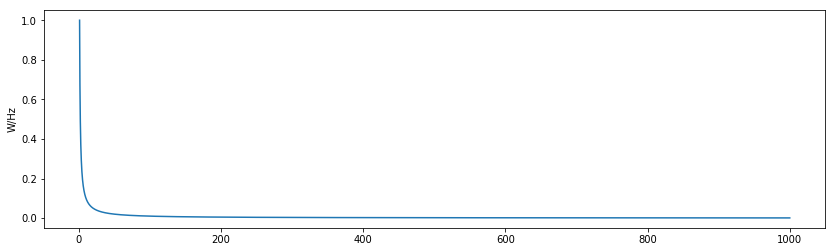

In [6]:
plt.plot(f, p);
plt.ylabel("W/Hz");

Se ora plottiamo la stessa curva in scala semilogaritmica abbiamo ancora una curva discendente (com'è giusto che sia):

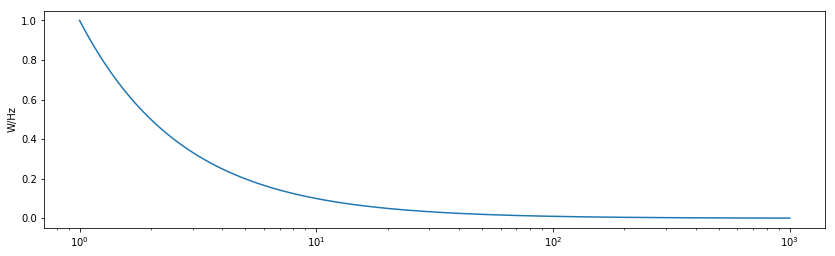

In [7]:
plt.semilogx(f, p);
plt.ylabel("W/Hz");

Se adesso guardiamo la **potenza** erogata su una specifica banda di frequenze, dobbiamo integrare la densità di potenza sulla banda in questione:

$$
    P(f_0, f_1) = \int_{f_0}^{f_1} p(f)df = \log\frac{f_1}{f_0} \mbox{ Watts}
$$


Questo è equivalente a costruire un filtro con larghezza di banda $[f_0, f_1]$ e a guardare la potenza in uscita dal filtro quando l'ingresso è il rumore rosa. Possiamo quindi costruire un banco di filtri che complessivamente coprono tutto il range di frequenze e plottare la potenza in uscita di ciascuno di essi. 

Da notare 2 cose:
 * la scala delle ordinate **è una misura di potenza (e quindi espressa in Watts)**
 * la scala delle ascisse è **l'indice cardinale** del filtro (che possiamo far corrispondere alla sua frequenza centrale

Se ogni filtro ha ampiezza lineare, ritroviamo la curva iperbolica (possiamo pensare alla densità spettrale di potenza come all'uscita di un banco di filtri di ampiezza infinitesimale)):

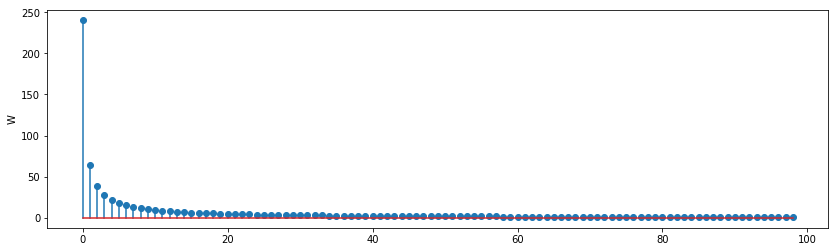

In [10]:
size = 10 # bande di 10Hz

f0 = 1
f1 = f0 + size 
energy = np.array([])
while f1 < MAX_FREQ:
    # indici nell'array della densità spettrale
    ix = int((f0 - 1) / STEP)
    iy = int((f1 - 1) / STEP)
    energy = np.r_[energy, np.sum(p[ix:iy])]
    f0 = f1
    f1 = f0 + size

plt.stem(energy);
plt.ylabel("W");

ovviamente possiamo plottare gli stessi dati qui sopra in scala semilogaritmica e avremo una curva discendente:

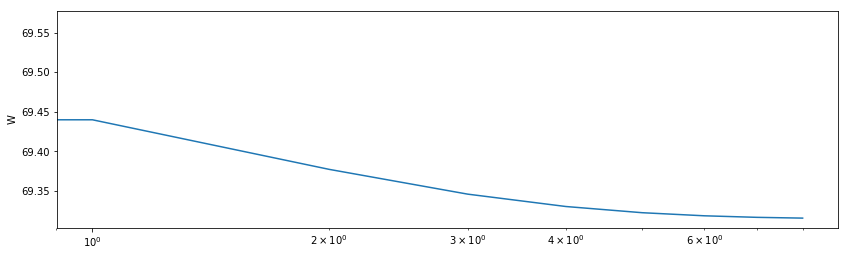

In [13]:
plt.semilogx(energy);
plt.ylabel("W");

Se adesso invece integriamo su bande di frequenza adiacenti per le quali il rapporto $f_1/f_0$ è costante (per esempio uguale a 2 in caso di bande di un'ottava ciascuna), la potenza erogata sarà costante su ogni banda:

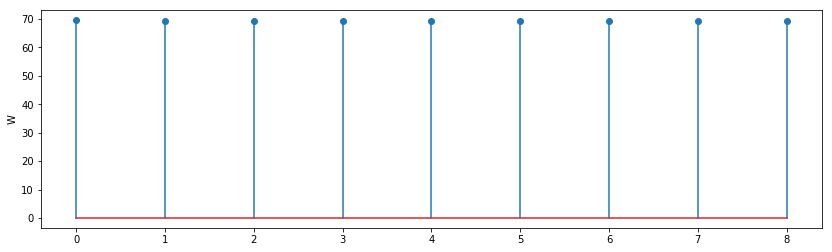

In [14]:
ratio = 6 # bande di un'ottava
#ratio = 3/2

f0 = 1
f1 = f0 * ratio
energy = np.array([])
while f1 < MAX_FREQ:
    # indici nell'array della densità spettrale
    ix = int((f0 - 1) / STEP)
    iy = int((f1 - 1) / STEP)
    energy = np.r_[energy, np.sum(p[ix:iy])]
    f0 = f1
    f1 = f0 * ratio

plt.stem(energy);
plt.ylabel("W");